In [852]:
# importing all the necessary packages
import pandas as pd
import pandas as pd, numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [853]:
# Reading CSV File
loan = pd.read_csv('./loan.csv')

/Users/prkumar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [854]:
# Getting the term by removing months
# converting term to integer


loan.term = loan.term.apply(lambda x: x.replace('months',''));
loan.term = loan.term.astype('int32')

In [855]:
# Removing % for for int_rate
# converting interest rate to float

loan.int_rate = loan.int_rate.apply(lambda x: x.replace('%',''));
loan.int_rate = loan.int_rate.astype('float')

In [856]:
# Dropping the columns of those which doesnt have the data 
loan = loan.dropna(axis =1, how = 'all')

In [857]:
# Dropping the columns as these doesnt have atleast 30% of data 
loan = loan.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d', 'desc'])

In [858]:
# Dropping all unique value columns
loan = loan.drop(columns=['id', 'member_id', 'url'])

In [859]:
# Removing all identical columns
loan = loan.loc[:,loan.nunique() != 1]

In [860]:
# converting employee length to pure numbers
def replaceEmpLength(x):
      x=x.replace('years', '')
      x=x.replace('year', '')
      x=x.replace('< 1', '0')
      x=x.replace('10+', '10')
      return x       

loan.emp_length = loan.emp_length.apply(lambda x:replaceEmpLength(str(x)) )     

In [861]:
# converting month-year to date format
def convertToDateMonYearWithNull(x):
    if pd.isnull(x):
        x = np.NaN
    else:
        x = datetime.strptime(x,'%b-%y')
    return x

In [862]:
# converting all of the dates to date fields

loan.issue_d = loan.issue_d.apply(lambda x: convertToDateMonYearWithNull(x))
loan.earliest_cr_line = loan.earliest_cr_line.apply(lambda x: convertToDateMonYearWithNull(x)) 
loan.last_pymnt_d = loan.last_pymnt_d.apply(lambda x:  convertToDateMonYearWithNull(x)) 
loan.last_credit_pull_d = loan.last_credit_pull_d.apply(lambda x:  convertToDateMonYearWithNull(x) )

In [863]:
## Dont need to impute the data as said by the instructor

## Removing Customer behaviour data

customer_behaviour_data = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                          'total_pymnt', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                          'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']

loan = loan.drop(columns=customer_behaviour_data)

In [864]:
# removing all of the accounts which has loan status as Current
loan = loan[loan.loan_status.apply(lambda x : x != 'Current')]

In [865]:
# All Defaulted are set to 0 and paid off to 1
loan.loan_status = loan.loan_status.apply(lambda x : 1 if x.strip() == "Charged Off" else 0)

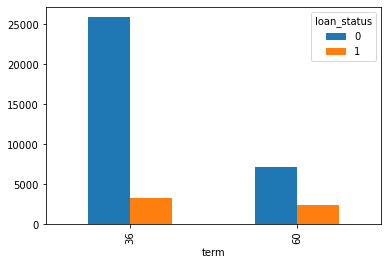

In [866]:
# Plotting a bar chart of loan and terms
# This bar plot displays that more users defaulted as term moves from 30 to 60 months. Users are less likely to default for less terms
loan.groupby('term')['loan_status'].value_counts().unstack().plot.bar()
plt.show()

The Bar plot shows that the users default move towards longer term

In [867]:
# Binning the variant columns

loan['annual_inc_bin'] = pd.qcut(loan['annual_inc'], q=5, labels=["very low", "low", "medium", "high", "very high"])
loan['int_rate_bin'] = pd.qcut(loan['int_rate'], q=5, labels=["very low", "low", "medium", "high", "very high"])
loan['dti_bin'] = pd.qcut(loan['dti'], q=5, labels=["very low", "low", "medium", "high", "very high"])
loan['loan_amount_bin'] = pd.cut(loan.loan_amnt, [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000','5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k+'])


Definition for getting the sub plot for a category against the Loan Status

In [868]:
def subplotColumnAgainstLoanStatus(df,column, xlabel):
    fig, ax = plt.subplots(figsize=(35,7))
    sns.countplot(x= column, hue='loan_status', data= df)
    plt.title(xlabel + ' by Default Count')
    plt.xlabel(xlabel)
    plt.ylabel('Defaulters Count')
    plt.show()

Definition for getting the Bar Plot for a category against the Loan Status

In [869]:
def defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(df,column,  xlabel):
    groupByColumn = df.groupby([column, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    groupByColumn['Total'] = groupByColumn[1] + groupByColumn[0] 
    groupByColumn['defaultsPercentage'] = groupByColumn[1] / groupByColumn['Total']
    groupByColumn.sort_values('defaultsPercentage', ascending=False)
    fig, ax = plt.subplots(figsize=(25,7))
    sns.barplot(x=column, y='defaultsPercentage', data=groupByColumn)
    plt.title(xlabel + ' vs Defaulters Ratio')
    plt.xlabel(xlabel)
    plt.ylabel('Defaulters Ratio')
    plt.show()

Definition to derive Box Plot against 2 columns of interest

In [870]:
def deriveBoxPlot(df, columnx, columny,  xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(25,7))
    sns.boxplot(x= columnx, y= columny, data = df)
    plt.title(xlabel + '  vs ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### UNIVARIANT ANALYSIS

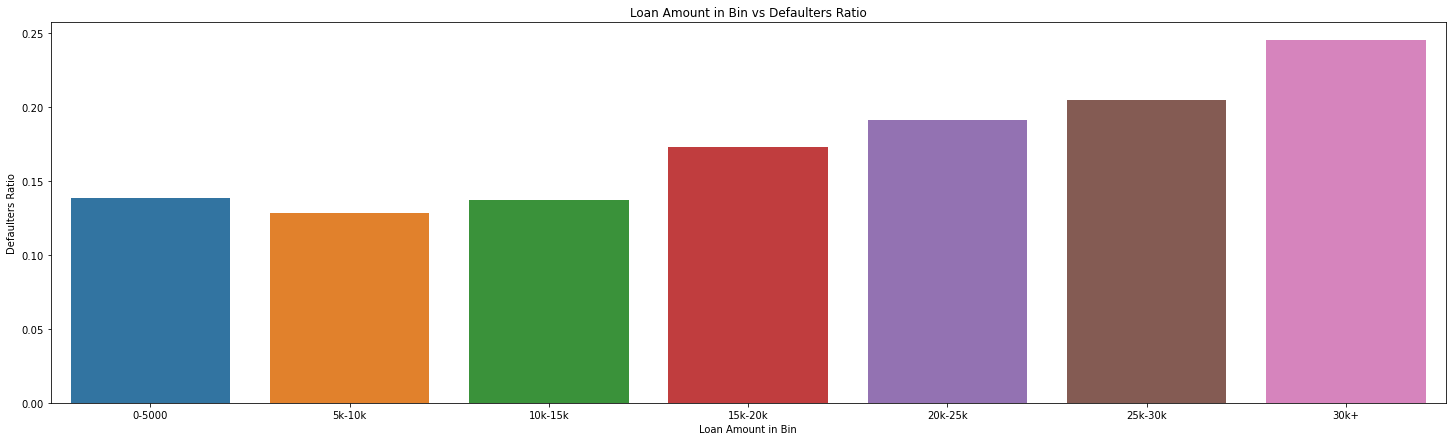

In [871]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'loan_amount_bin', "Loan Amount in Bin");

The graph shows the defaults increase as the loan amount increases

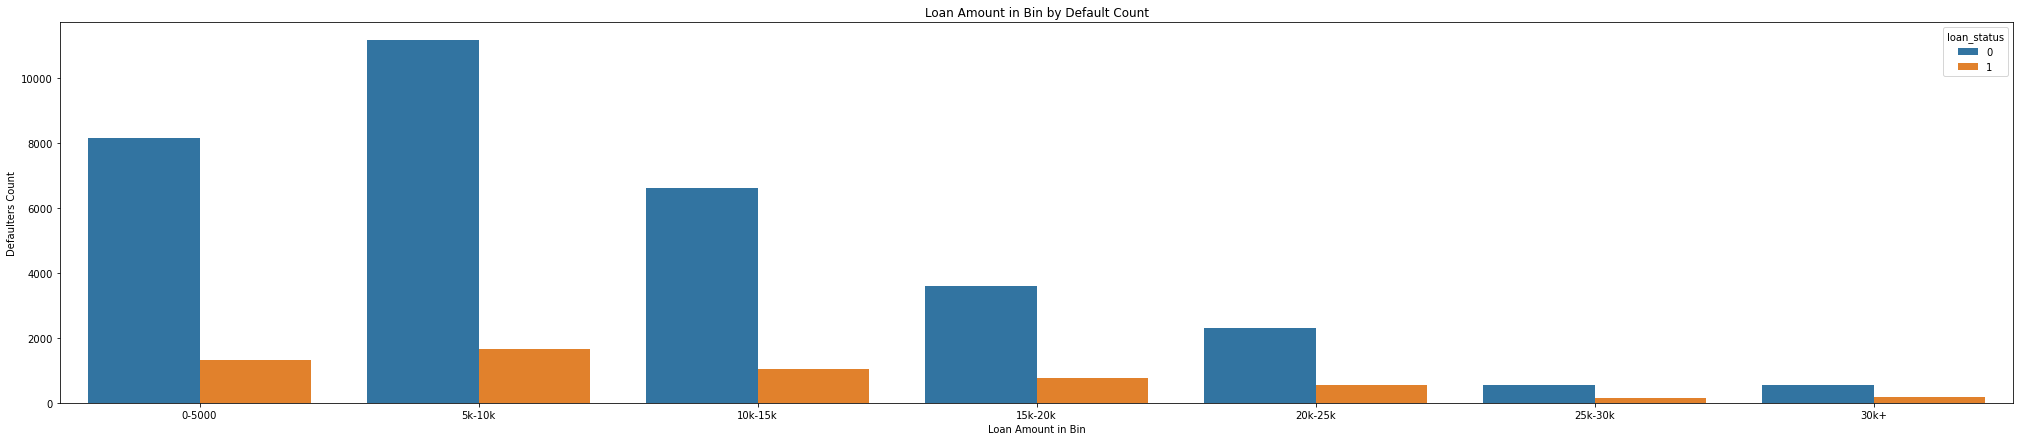

In [872]:
subplotColumnAgainstLoanStatus(loan, 'loan_amount_bin', "Loan Amount in Bin");

The graph shows that there are more defaulters in 5k-10k. But when we derive against the percentage of defaulters it shows higher loan amount has more defaulters

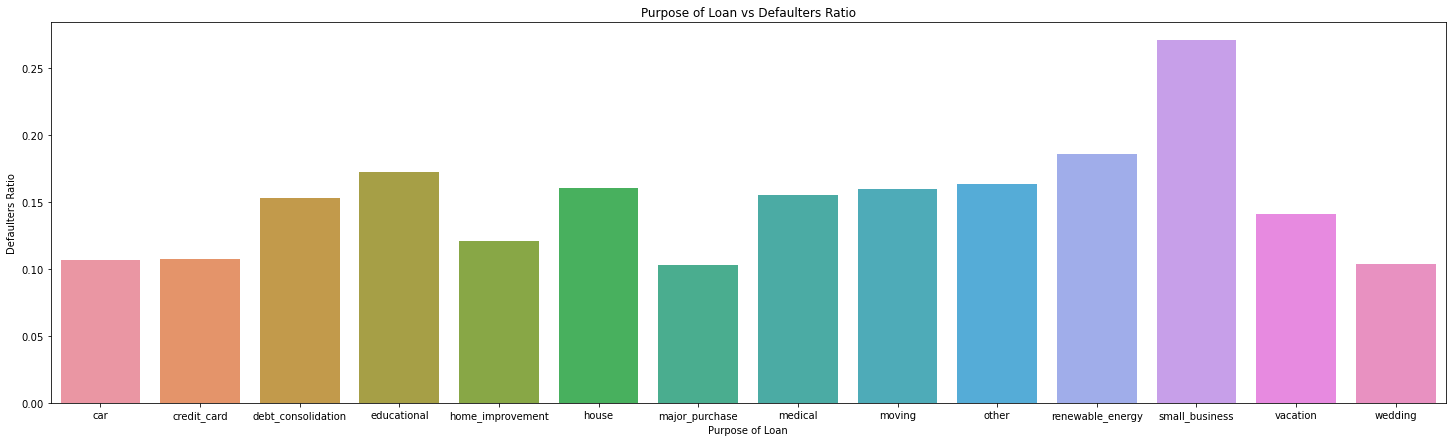

In [873]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'purpose', 'Purpose of Loan');

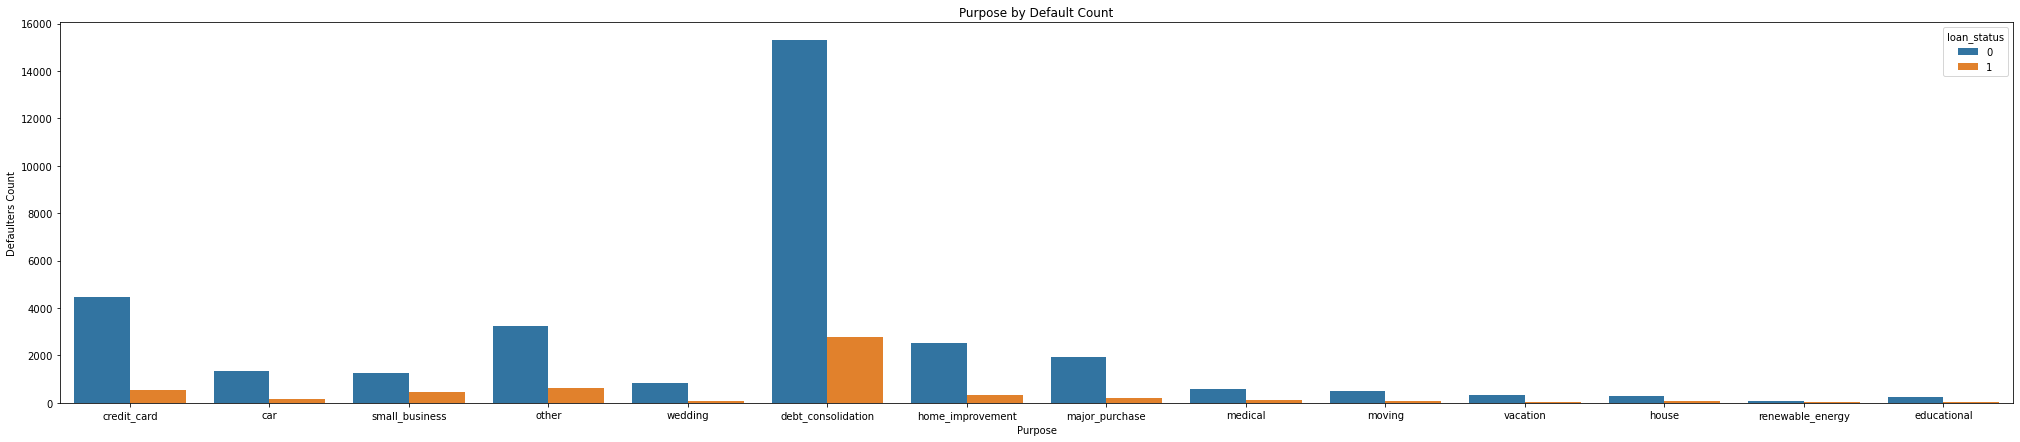

In [874]:
subplotColumnAgainstLoanStatus(loan, 'purpose', "Purpose");

1. Small business owners default more than 25%
2. Debt Consolidation holds the main purpose for taking the loans, and has around 15% defaulters

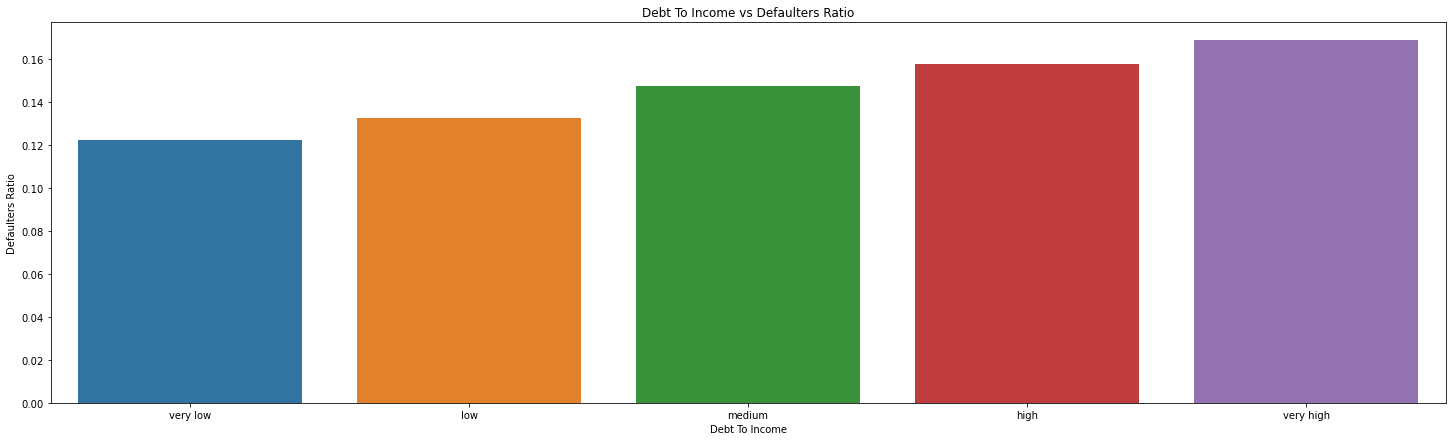

In [875]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'dti_bin', 'Debt To Income');

1.As Debt to Income ratio grows higher, the defaulters get higher

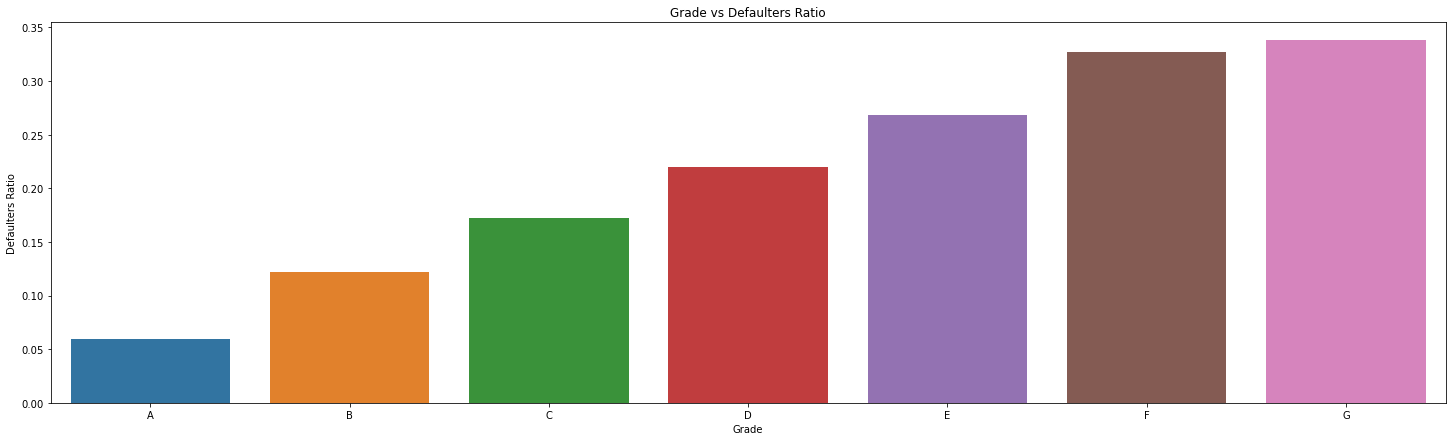

In [876]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'grade', 'Grade');

1. Higher the grade, higher the defaulters

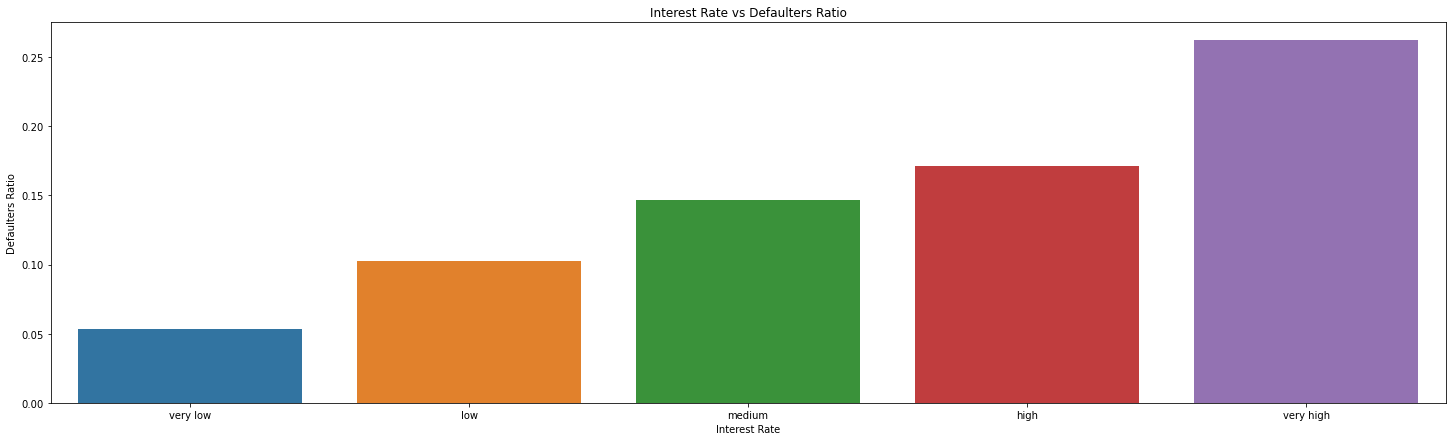

In [877]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'int_rate_bin', 'Interest Rate');

1. Higher the interst rate higher the defaulters

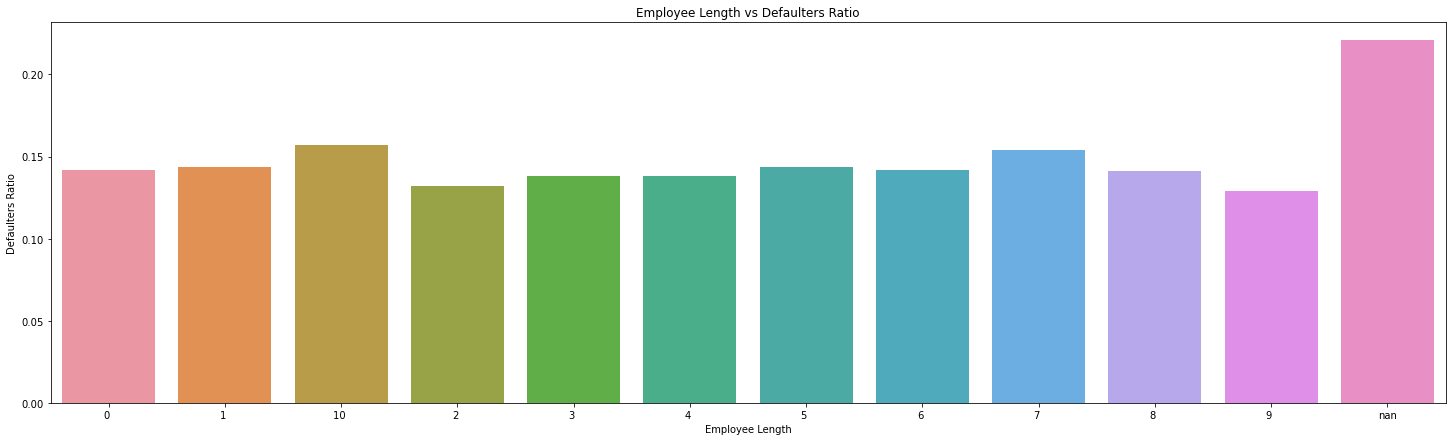

In [878]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'emp_length', "Employee Length");

1. Employee length may not matter for giving the loan

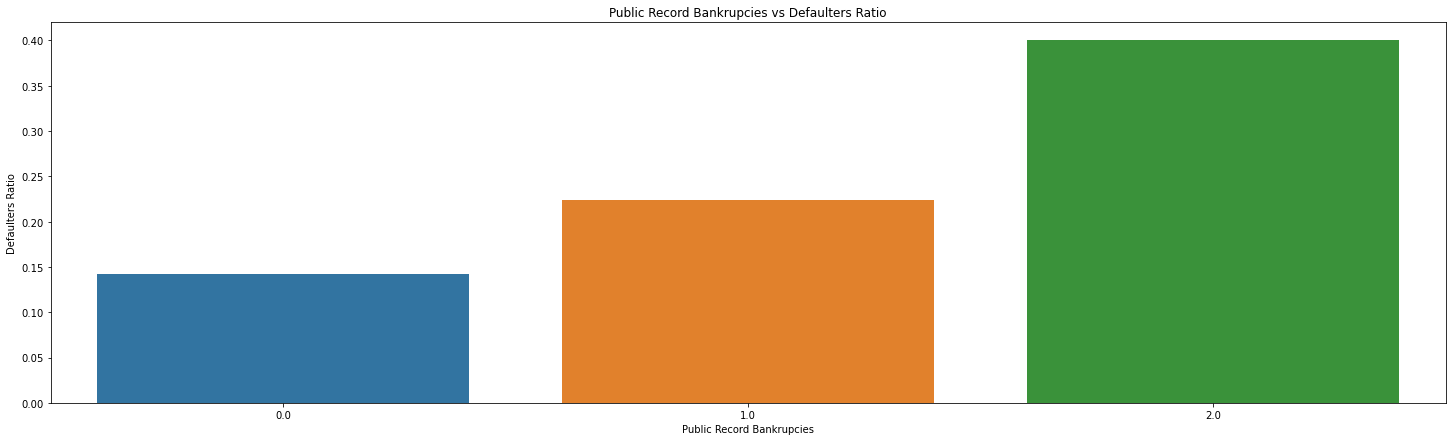

In [879]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'pub_rec_bankruptcies', "Public Record Bankrupcies");

Folks who have higher bankrupcies, the defaulters are bound to increase

### BIVARIANT ANALYSIS

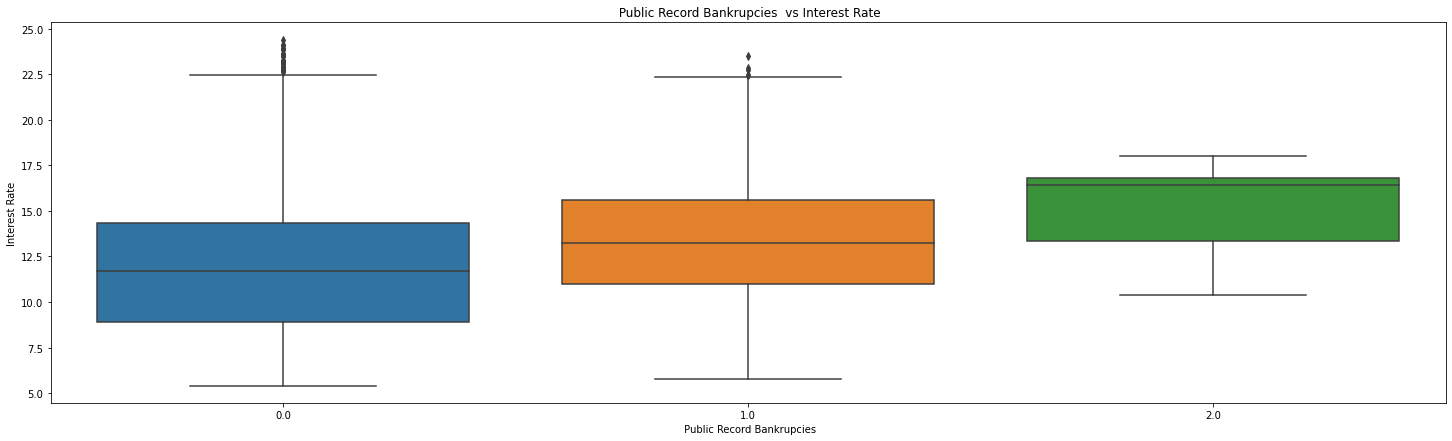

In [880]:
deriveBoxPlot(loan, 'pub_rec_bankruptcies', 'int_rate', " Public Record Bankrupcies", "Interest Rate")

Bankrupcies and Interest rates are correlated. We could see the Median increases with Bankrupcies and Interest rates 

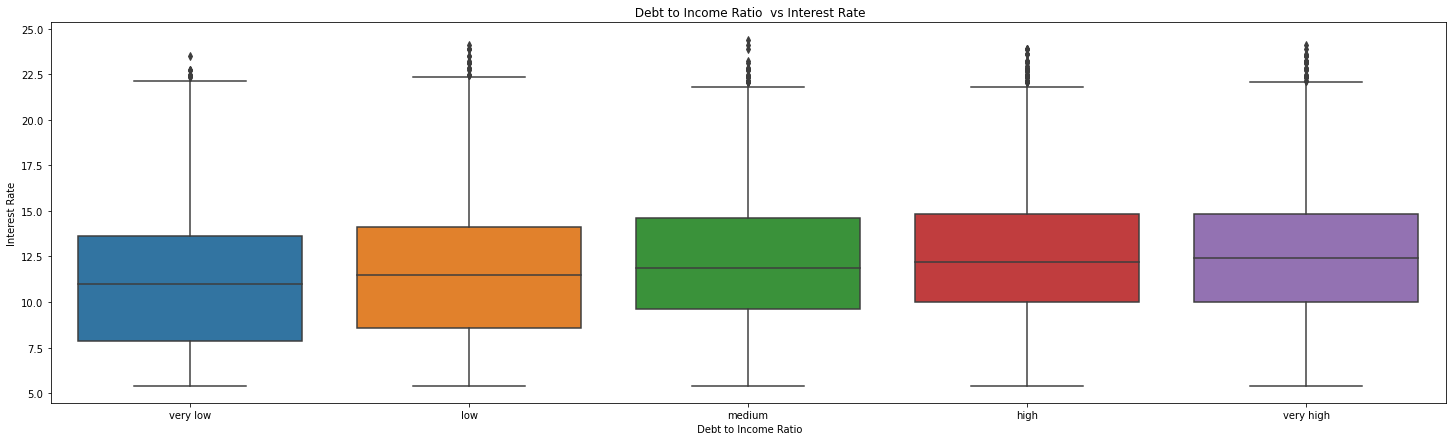

In [881]:
deriveBoxPlot(loan, 'dti_bin', 'int_rate', " Debt to Income Ratio", "Interest Rate")

Debt to Income Ratio and Interest rates are correlated. We could see the Median increases with Debt to Income Ratio and Interest rates 

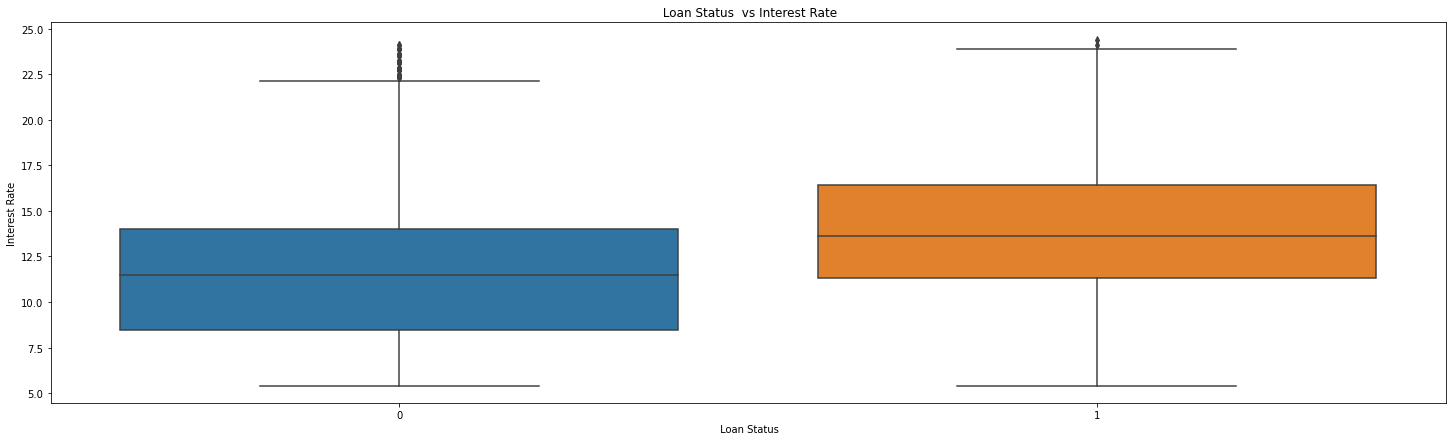

In [882]:
deriveBoxPlot(loan, 'loan_status', 'int_rate', " Loan Status", "Interest Rate")

Loan Status and Interest rates are correlated. We could see the Median increases with Loan Status and Interest rates 

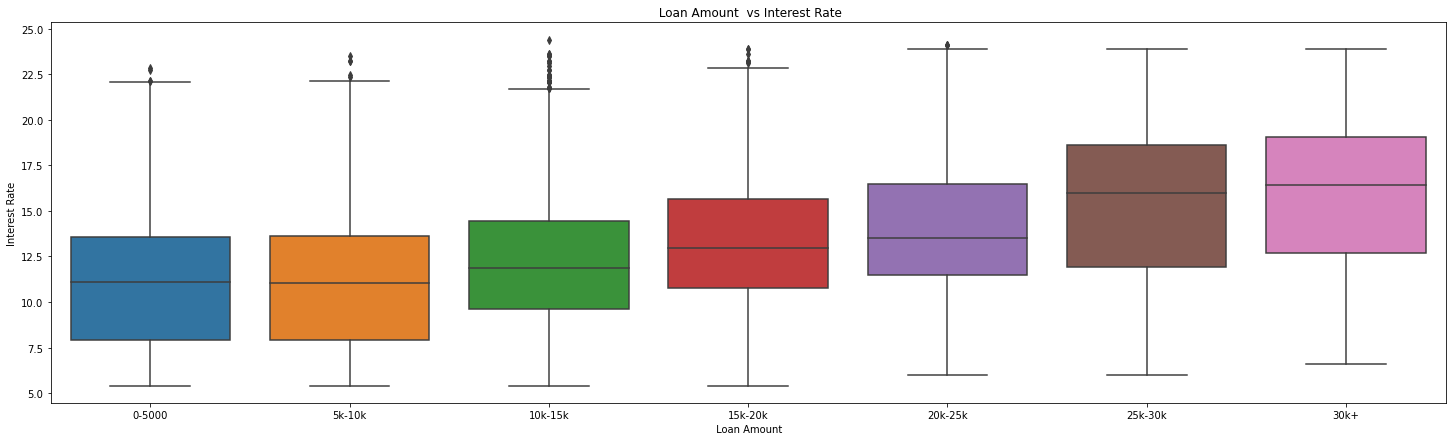

In [883]:
deriveBoxPlot(loan, 'loan_amount_bin', 'int_rate', " Loan Amount", "Interest Rate")

Loan Amount and Interest rates are correlated. We could see the Median increases with Loan Amount
and Interest rates



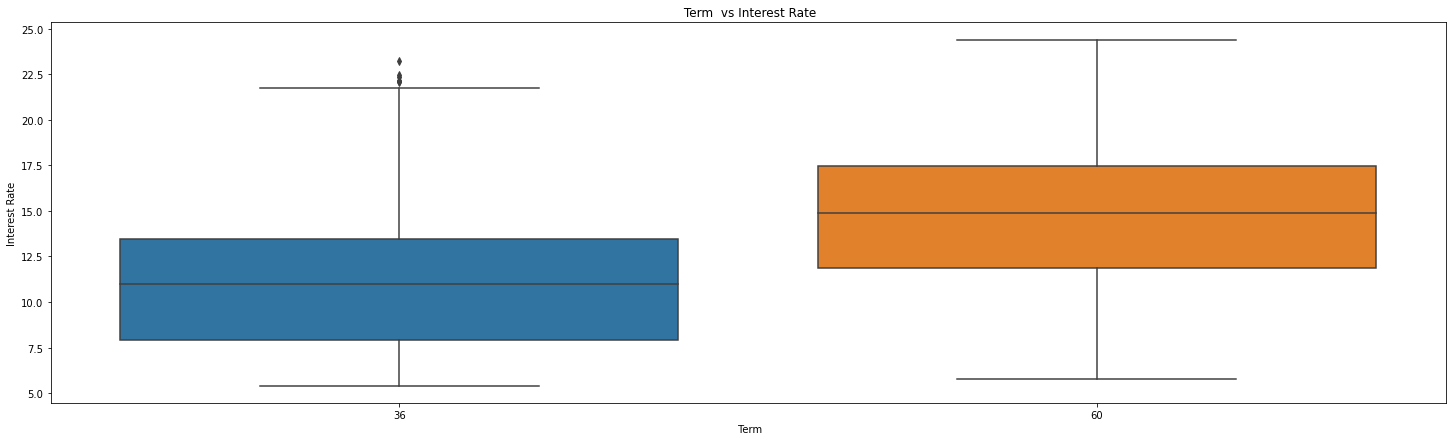

In [884]:
deriveBoxPlot(loan, 'term', 'int_rate', " Term", "Interest Rate")

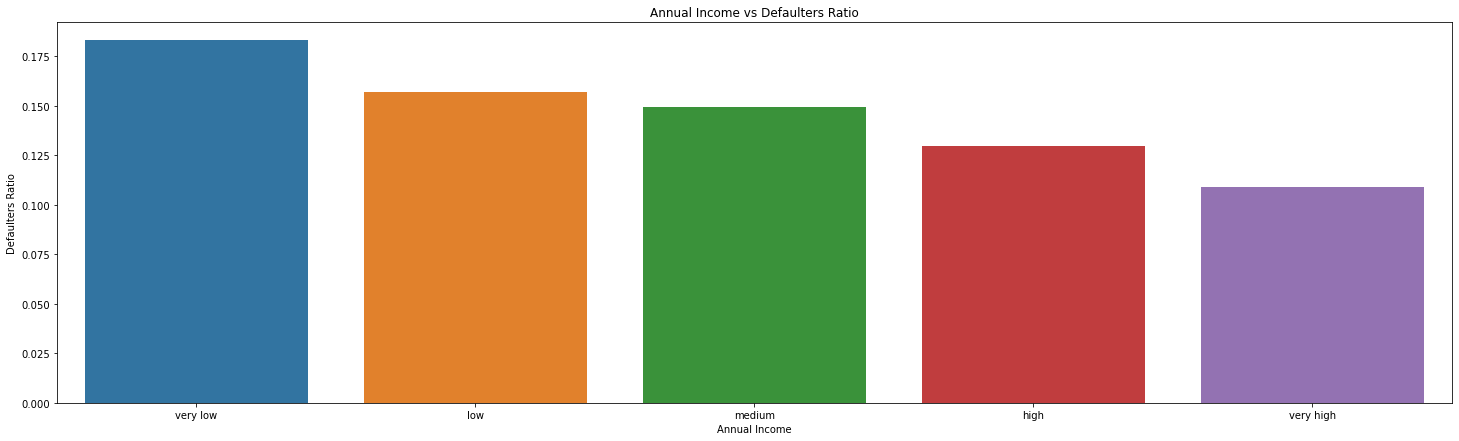

In [893]:
defaultsPercentageByCategoryAgainstLoanStatusWithBarPlot(loan, 'annual_inc_bin', "Annual Income");

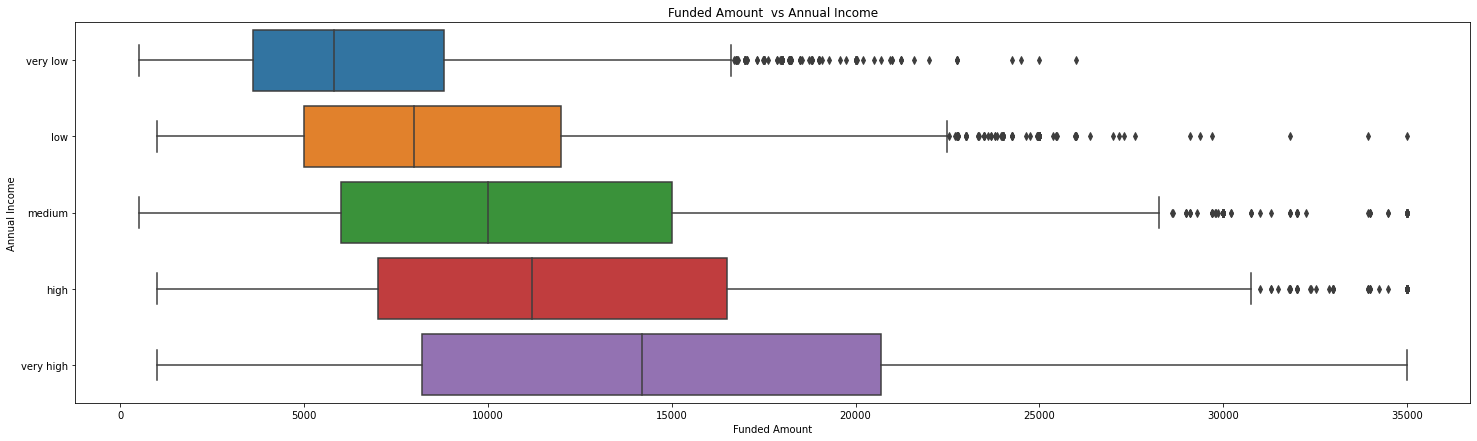

In [911]:
deriveBoxPlot(loan, 'funded_amnt', 'annual_inc_bin', "Funded Amount", "Annual Income")

<Figure size 1152x360 with 0 Axes>

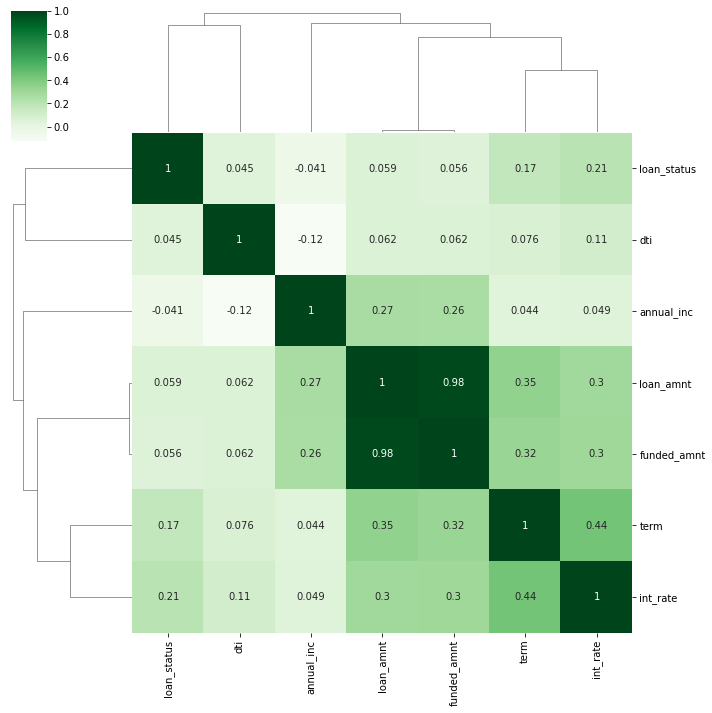

In [913]:
corr_matrix= loan[['loan_amnt', 'funded_amnt', 'term', 'loan_status', 'int_rate', 'annual_inc', 'dti']]
corr_matrix.corr()
plt.figure(figsize = (16,5))
sns.clustermap(corr_matrix.corr(), annot=True, cmap="Greens")
plt.show()